In [42]:
from pylsl import StreamInlet, resolve_stream
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

# First resolve an EEG stream on the lab network
print("looking for an EEG stream...")
streams = resolve_stream('type','EEG')

# Create a new inlet to read from the stream
inlet = StreamInlet(streams[0])


# Create a figure and axes for plotting
fig, ax = plt.subplots()
lines = []  # To store line objects for each electrode

# Initialize lines for each electrode
for i in range(73):
    line, = ax.plot([], [], label=f'Electrode {i+1}')
    lines.append(line)

# Set plot labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude (uV)')
ax.set_title('EEG Stream')
ax.legend(loc='upper right', ncol=8)  # Adjust ncol as needed

# Set up the plot limits
x_lim = 1000  # Adjust this value based on your desired time window
ax.set_xlim(0, x_lim)
ax.set_ylim(-100, 100)  # Adjust based on your signal amplitude range

# Initialize data buffers for plotting
x_data = np.array([])
y_data = np.zeros((73, x_lim))

# Function to update the plot
def update_plot(frame):
    global x_data, y_data

    # Get a new sample
    sample, timestamp = inlet.pull_sample()
    print(f'sampe is {sample.shape}, timestamp is {timestamp.shape}')


    # Add the sample to the data buffers
    x_data = np.append(x_data, timestamp)
    y_data = np.roll(y_data, -1, axis=1)
    y_data[:, -1] = sample
    print(x_data.shape)
    print(y_data.shape)

    # Update the lines with new data
    for i, line in enumerate(lines):
        line.set_data(x_data[-x_lim:], y_data[i, -x_lim:])

    # Adjust x-axis limit if necessary
    if x_data[-1] > x_lim:
        ax.set_xlim(x_data[-1] - x_lim, x_data[-1])

    return lines  # Return the lines to be updated

# Animate the plot
ani = animation.FuncAnimation(fig, update_plot, blit=True, interval=10, cache_frame_data=False)

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'pylsl'

In [ ]:
from pylsl import StreamInlet, resolve_stream
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np


# First resolve an EEG stream on the lab network
print("looking for an EEG stream...")
streams = resolve_stream('type','EEG')
# print(streams[0])
# Create a new inlet to read from the stream
# inlet = StreamInlet(streams[0])


looking for an EEG stream...


2024-12-02 11:29:26.591 (   2.003s) [          167B46]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 11:29:26.591 (   2.003s) [          167B46]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 11:29:26.591 (   2.003s) [          167B46]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2024-12-02 11:29:26.592 (   2.003s) [          167B46]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 11:29:26.592 (   2.003s) [          167B46]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2024-12-02 11:29:26.592 (   2.004s) [          167B46]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 11:29:26.592 (   2.004s) [          167B46]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2024-12-02 11:29:26.592 (   2.004s) [          167B46]      netinterfaces.cpp:91    I

In [2]:
from pylsl import resolve_streams

# Resolve all streams on the network
streams = resolve_streams()
print(len(streams))
# Print information about each stream
if streams:
    for stream in streams:
        print("Name:", stream.name())
        print("Type:", stream.type())
        print("Source ID:", stream.source_id())
        print("Channel Count:", stream.channel_count())
        print("Sampling Rate:", stream.nominal_srate())
        print("--------------------")
else:
    print("No LSL streams found.")

0
No LSL streams found.


In [ ]:
print(streams[0])

In [ ]:
from pylsl import StreamInlet, resolve_stream
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
import numpy as np

# First resolve an EEG stream on the lab network
print("looking for an EEG stream...")
streams = resolve_stream('type', 'EEG')

# Create a new inlet to read from the stream
inlet = StreamInlet(streams[0])

# Create a Bokeh figure
p = figure(width=1000, height=600, x_axis_label='Time (s)', y_axis_label='Amplitude (uV)', title="EEG Stream")

# Initialize data sources for each electrode
sources = []
lines = []
for i in range(73):
    source = ColumnDataSource(data=dict(x=[], y=[]))
    sources.append(source)
    line = p.line(x='x', y='y', source=source, legend_label=f'Electrode {i+1}')
    lines.append(line)

p.legend.location = "top_right"
p.legend.click_policy="hide"  # Allow hiding lines by clicking on legend

# Set up the plot limits
x_lim = 1000  # Adjust this value based on your desired time window
p.x_range.start = 0
p.x_range.end = x_lim
p.y_range.start = -100  # Adjust based on your signal amplitude range
p.y_range.end = 100

# Initialize data buffers for plotting
x_data = np.array([])
y_data = np.zeros((73, x_lim))

# Function to update the plot
def update_plot():
    global x_data, y_data

    # Get a new sample
    sample, timestamp = inlet.pull_sample()

    # Add the sample to the data buffers
    x_data = np.append(x_data, timestamp)
    y_data = np.roll(y_data, -1, axis=1)
    y_data[:, -1] = sample

    # Ensure x_data and y_data have compatible shapes
    x_data = x_data[-x_lim:]

    # Update the data sources
    for i, source in enumerate(sources):
        new_data = dict(x=x_data, y=y_data[i, -x_lim:])
        source.stream(new_data, rollover=x_lim)

    # Adjust x-axis limit if necessary
    if x_data[-1] > x_lim:
        p.x_range.start = x_data[-1] - x_lim
        p.x_range.end = x_data[-1]

# Add a periodic callback to update the plot
curdoc().add_periodic_callback(update_plot, 10)  # Update every 10 milliseconds

# Show the plot
curdoc().add_root(column(p))

In [ ]:
print("looking for an EEG stream...")
streams = resolve_stream('type', 'EEG')
inlet = StreamInlet(streams[0])

while True:

    sample, timestamp = inlet.pull_sample()
    print(sample[0])
    print(timestamp)

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import holoviews as hv
from holoviews.operation.normalization import subcoordinate_group_ranges
from holoviews.operation.datashader import rasterize
from holoviews.plotting.links import RangeToolLink
import colorcet as cc
from scipy.stats import zscore
hv.extension('bokeh')

In [ ]:
import sparse
functions = [func for func in dir(sparse) if callable(getattr(sparse, func))]
print(functions) 


In [ ]:
dir(sparse)

In [ ]:
from pathlib import Path

import holoviews as hv
import mne
import pandas as pd
import panel as pn
import pooch
from holoviews.operation.downsample import downsample1d

pn.extension('tabulator')
hv.extension('bokeh')

In [ ]:
DATA_URL = 'https://datasets.holoviz.org/eeg/v1/S001R04.edf'
DATA_DIR = Path('./data')
DATA_FILENAME = Path(DATA_URL).name
DATA_PATH = DATA_DIR / DATA_FILENAME

DATA_DIR.mkdir(parents=True, exist_ok=True)

# Download the data if it doesn't exist
if not DATA_PATH.exists():
    print(f'Downloading data to: {DATA_PATH}')
    pooch.retrieve(
        url=DATA_URL,
        known_hash=None,
        fname=DATA_FILENAME,
        path=DATA_DIR,
        progressbar=True,
    )
else:
    print(f'Data exists at: {DATA_PATH}')

Data exists at: data/S001R04.edf


In [ ]:
raw = mne.io.read_raw_edf(DATA_PATH, preload=True)
print('num samples in dataset:', len(raw.times) * len(raw.ch_names))
raw.info

In [ ]:
raw.describe(data_frame=True).sample(5)

In [ ]:
raw.set_eeg_reference("average")

In [ ]:
raw.rename_channels(lambda s: s.strip("."));

In [ ]:
montage = mne.channels.make_standard_montage("standard_1005")
raw.set_montage(montage, match_case=False)

In [ ]:
sphere=(0, 0.015, 0, 0.099) # manually adjust the y origin coordinate and radius
raw.plot_sensors(show_names=True, sphere=sphere, show=False);

In [ ]:
df = raw.to_data_frame()
df.set_index('time', inplace=True) 
df.head()

In [ ]:
time_dim = hv.Dimension("time", unit="s") # match the df index name, 'time'

In [ ]:
curves = {}
for col in df.columns:
    col_amplitude_dim = hv.Dimension(col, label='amplitude', unit="µV") # map amplitude-labeled dim per chan
    curves[col] = hv.Curve(df, time_dim, col_amplitude_dim, group='EEG', label=col)
    # Apply options
    curves[col] = curves[col].opts(
        subcoordinate_y=True, # Essential to create vertically stacked plot
        subcoordinate_scale=3,
        color="black",
        bgcolor="whitesmoke",
        line_width=1,
        hover_tooltips = [
            ("type", "$group"),
            ("channel", "$label"),
            ("time"),
            ("amplitude")],
        tools=['xwheel_zoom'],
        active_tools=["box_zoom"]
    )

In [ ]:
curves_overlay = hv.Overlay(curves, kdims=[time_dim, 'Channel'])

overlay_opts = dict(ylabel="Channel",
    show_legend=False,
    padding=0,
    min_height=600,
    responsive=True,
    title="",
)

curves_overlay = curves_overlay.opts(**overlay_opts)

In [ ]:
curves_overlay_lttb = downsample1d(curves_overlay, algorithm='minmax-lttb')

In [ ]:
from scipy.stats import zscore
from holoviews.operation.datashader import rasterize
from holoviews.plotting.links import RangeToolLink

channels = df.columns
time = df.index.values

y_positions = range(len(channels))
yticks = [(i, ich) for i, ich in enumerate(channels)]
z_data = zscore(df, axis=0).T
minimap = rasterize(hv.Image((time, y_positions, z_data), [time_dim, "Channel"], "amplitude"))

minimap_opts = dict(
    cmap="RdBu_r",
    colorbar=False,
    xlabel='',
    alpha=0.5,
    yticks=[yticks[0], yticks[-1]],
    toolbar='disable',
    height=120,
    responsive=True,
    cnorm='eq_hist',
    )

minimap = minimap.opts(**minimap_opts)

AttributeError: module 'sparse' has no attribute 'numba_backend'

In [ ]:
from bokeh.plotting import figure, curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from pylsl import StreamInlet, resolve_stream

# EEG parameters
EEG_CHANNELS = 8  # Number of EEG channels
SAMPLE_RATE = 500  # Sampling rate in Hz
WINDOW_SIZE = 10  # Time window to display in seconds

# Resolve LSL stream
print("Looking for an EEG stream...")
streams = resolve_stream('type', 'EEG')
inlet = StreamInlet(streams[0])
print("EEG stream found!")

# Create Bokeh data source
source = ColumnDataSource(data=dict(time=[], eeg1=[], eeg2=[], eeg3=[], eeg4=[], eeg5=[], eeg6=[], eeg7=[], eeg8=[]))

# Create Bokeh plot
p = figure(width=1000, height=600, title="Multichannel EEG Data")
p.xaxis.axis_label = "Time (s)"
p.yaxis.axis_label = "Amplitude (µV)"

# Add glyphs for each EEG channel
for i in range(EEG_CHANNELS):
    p.line(x='time', y=f'eeg{i+1}', source=source, line_width=2, legend_label=f'Channel {i+1}')

# Add extra y-axis for each channel (optional)
for i in range(EEG_CHANNELS):
    p.extra_y_ranges[f'eeg{i+1}_range'] = Range1d(start=-500, end=500)  # Adjust range as needed
    p.add_layout(LinearAxis(y_range_name=f'eeg{i+1}_range'), 'left')

p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Update function
def update():
    # Get new EEG data
    sample, timestamp = inlet.pull_sample()

    # Append new data to source
    new_data = dict(
        time=[source.data['time'][-1] + 1 / SAMPLE_RATE if source.data['time'] else 0],
        eeg1=[sample[0]],
        eeg2=[sample[1]],
        eeg3=[sample[2]],
        eeg4=[sample[3]],
        eeg5=[sample[4]],
        eeg6=[sample[5]],
        eeg7=[sample[6]],
        eeg8=[sample[7]],
    )
    source.stream(new_data, rollover=int(SAMPLE_RATE * WINDOW_SIZE))

# Add periodic callback for updating the plot
curdoc().add_periodic_callback(update, 1000 / SAMPLE_RATE)

# Show the plot
curdoc().add_root(column(p))

Looking for an EEG stream...
EEG stream found!


In [ ]:
RangeToolLink(minimap, curves_overlay_lttb, axes=["x", "y"],
              boundsx=(0, time[len(time)//3]), # limit the initial selected x-range of the minimap
              boundsy=(-.5,len(channels)//3) # limit the initial selected y-range of the minimap
             )

In [ ]:
nb_app = (curves_overlay_lttb + minimap).opts(shared_axes=False).cols(1)

In [ ]:
nb_app

In [ ]:
# Get the initial time of the experiment
orig_time = raw.annotations.orig_time

# Convert the annotations to a DataFrame
annotations_df = raw.annotations.to_data_frame()

# Ensure the 'onset' column is in UTC timezone
annotations_df['onset'] = annotations_df['onset'].dt.tz_localize('UTC')

# Create 'start' and 'end' columns in seconds relative to the experiment start
annotations_df['start'] = (annotations_df['onset'] - orig_time).dt.total_seconds()
annotations_df['end'] = annotations_df['start'] + annotations_df['duration']

# Preview the annotations DataFrame
annotations_df.head()

In [ ]:
import datetime 
x1 = ['2017-03-15', '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19']
y1 = [0.02, 0.02, 0.02, 0.01, 0.0]

x2 = ['2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24']
y2 = [0.23, 0.24, 0.25, 0.25, 0.27]

#converting x-axis to datetime
# x1 = [datetime.strptime(date, "%Y-%m-%d") for date in x1]
# x2 = [datetime.strptime(date, "%Y-%m-%d") for date in x2]

# create a new plot with a title and axis labels
p = figure(title="my Chart", x_axis_label='date', y_axis_label='percentage', x_axis_type='datetime')

p.multi_line(xs = [x1, x2] , ys = [y1, y2], color=['red','green'])

html = file_html(p, CDN, "my plot")

NameError: name 'file_html' is not defined

In [ ]:
from pylsl import StreamInlet, resolve_stream
from bokeh.plotting import figure, curdoc
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
import numpy as np


streams = resolve_stream()
assert len(streams) == 1
inlet = StreamInlet(streams[0])

from mne_lsl.datasets import sample
from mne_lsl.player import PlayerLSL
from mne_lsl.stream import EpochsStream, StreamLSL

ModuleNotFoundError: No module named 'mne_lsl'

In [ ]:
import time
import uuid

from matplotlib import pyplot as plt
from mne import set_log_level

from mne_lsl.datasets import sample
from mne_lsl.player import PlayerLSL as Player
from mne_lsl.stream import StreamLSL as Stream

set_log_level("WARNING")

In [ ]:
source_id = uuid.uuid4().hex
fname = sample.data_path() / "sample-ant-raw.fif"
player = Player(fname, chunk_size=200, source_id=source_id).start()
player.info

2024-11-27 11:19:40.909 ( 136.714s) [           14F6D]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2024-11-27 11:19:40.910 ( 136.714s) [           14F6D]      netinterfaces.cpp:91    I

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 63 EEG, 2 EOG, 1 Galvanic skin response, 1 ECG, 1 Stimulus
 custom_ref_applied: False
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 68
 projs: []
 sfreq: 1024.0 Hz
>

In [ ]:
stream = Stream(bufsize=2, source_id=source_id).connect()
stream.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 63 EEG, 2 EOG, 1 Galvanic skin response, 1 ECG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 1024.0 Hz
>

In [ ]:
ch_types = stream.get_channel_types(unique=True)
print(f"Channel types included: {', '.join(ch_types)}")
stream.pick("eeg")  # channel selection
assert "CPz" not in stream.ch_names  # reference absent from the data stream
stream.add_reference_channels("CPz")
stream.set_eeg_reference("average")
stream.info

Channel types included: eeg, eog, gsr, ecg, stim


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fpz, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 64 EEG
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1024.0 Hz
>

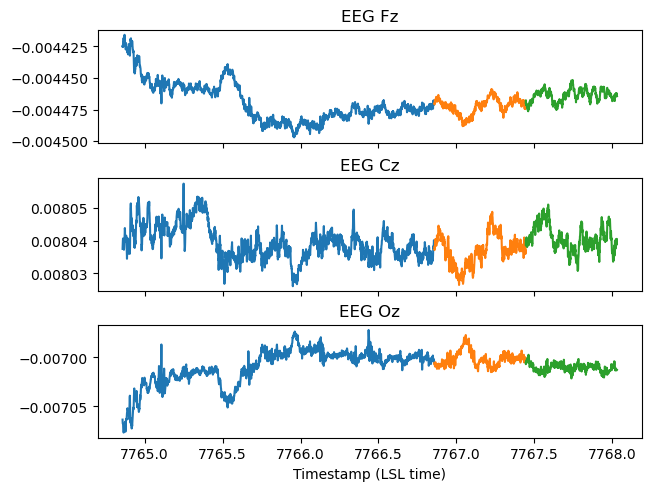

In [ ]:
picks = ("Fz", "Cz", "Oz")  # channel selection
f, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
for _ in range(3):  # acquire 3 separate window
    # figure how many new samples are available, in seconds
    winsize = stream.n_new_samples / stream.info["sfreq"]
    # retrieve and plot data
    data, ts = stream.get_data(winsize, picks=picks)
    for k, data_channel in enumerate(data):
        ax[k].plot(ts, data_channel)
    time.sleep(0.5)
for k, ch in enumerate(picks):
    ax[k].set_title(f"EEG {ch}")
ax[-1].set_xlabel("Timestamp (LSL time)")
plt.show()

In [ ]:
player.stop()

2024-11-27 11:24:45.035 ( 440.835s) [R_MNE-LSL-Play  ]      data_receiver.cpp:344    ERR| Stream transmission broke off (Input stream error.); re-connecting...


<Player: MNE-LSL-Player | OFF | /Users/dannemrodov/mne_data/MNE-LSL-data/sample/sample-ant-raw.fif>

In [2]:
import time
import uuid

import numpy as np

from mne_lsl.lsl import (
    StreamInfo,
    StreamInlet,
    StreamOutlet,
    local_clock,
    resolve_streams,
)

In [4]:
streams = resolve_streams()
# assert len(streams) == 1
inlet = StreamInlet(streams[0])
inlet.open_stream()
sinfo = inlet.get_sinfo()
streams[0]
sinfo

IndexError: list index out of range

In [ ]:
sinfo.get_channel_names()

In [ ]:
for i in range(100):
    sample, timestamp = inlet.pull_sample()
    print(sample.shape)
    print(timestamp)



(73,)
731071.6311275499
(73,)
731071.6330806749
(73,)
731071.6350337999
(73,)
731071.6369869249
(73,)
731071.6389400499
(73,)
731071.6408931749
(73,)
731071.6428462999
(73,)
731071.6447994249
(73,)
731071.6467525499
(73,)
731071.6487056749
(73,)
731071.6506587999
(73,)
731071.6526119249
(73,)
731071.6545650499
(73,)
731071.6565181749
(73,)
731071.6584712999
(73,)
731071.6604244249
(73,)
731071.6623775499
(73,)
731071.6643306749
(73,)
731071.6662837999
(73,)
731071.6682369249
(73,)
731071.6701900499
(73,)
731071.6721431749
(73,)
731071.6740962999
(73,)
731071.6760494249
(73,)
731071.6780025499
(73,)
731071.6799556749
(73,)
731071.6819087999
(73,)
731071.6832471
(73,)
731071.685200225
(73,)
731071.68715335
(73,)
731071.689106475
(73,)
731071.6910596
(73,)
731071.693012725
(73,)
731071.69496585
(73,)
731071.696918975
(73,)
731071.6988721
(73,)
731071.700825225
(73,)
731071.70277835
(73,)
731071.704731475
(73,)
731071.7066846
(73,)
731071.708637725
(73,)
731071.71059085
(73,)
731071.712543

In [ ]:

0

set_log_level("WARNING")

In [1]:
stream = Stream(bufsize=2, source_id='acquisition').connect()
stream.info

NameError: name 'Stream' is not defined

In [ ]:
ch_types = stream.get_channel_types(unique=True)
print(f"Channel types included: {', '.join(ch_types)}")

Channel types included: eeg


In [ ]:
stream.pick("eeg")  # channel selection
stream.add_reference_channels("ref")
stream.set_eeg_reference("average")
stream.info

<Info | 8 non-empty values
 bads: []
 ch_names: Trig1, Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, ...
 chs: 74 EEG
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 74
 projs: []
 sfreq: 512.0 Hz
>

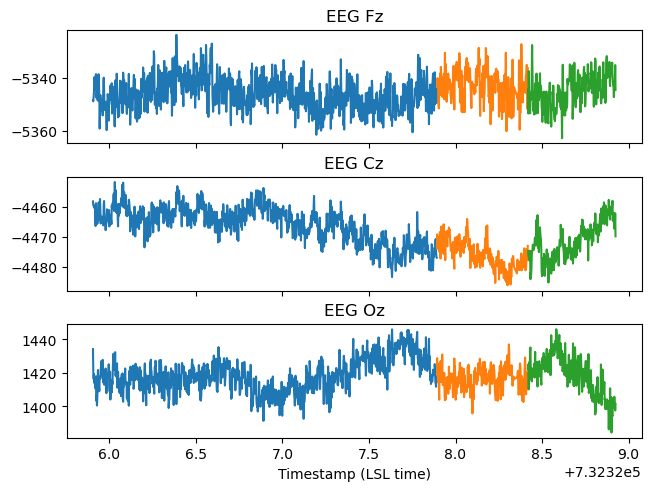

In [ ]:
picks = ("Fz", "Cz", "Oz")  # channel selection
f, ax = plt.subplots(3, 1, sharex=True, constrained_layout=True)
for _ in range(3):  # acquire 3 separate window
    # figure how many new samples are available, in seconds
    winsize = stream.n_new_samples / stream.info["sfreq"]
    # retrieve and plot data
    data, ts = stream.get_data(winsize, picks=picks)
    for k, data_channel in enumerate(data):
        ax[k].plot(ts, data_channel)
    time.sleep(0.5)
for k, ch in enumerate(picks):
    ax[k].set_title(f"EEG {ch}")
ax[-1].set_xlabel("Timestamp (LSL time)")
plt.show()

In [ ]:
winsize

0.513671875

In [ ]:
data, ts = stream.get_data(2, picks='eeg')
print(data.shape)

(74, 1024)


In [ ]:
stream.info['ch_names']

['Trig1',
 'Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'I1',
 'PO9',
 'I2',
 'PO10',
 'EOGH1',
 'EOGH2',
 'EOGVU',
 'EOGVD',
 'ref']

In [ ]:
from bokeh.plotting import curdoc, figure
from bokeh.models import ColumnDataSource
import random

def update_plot():
  """
  This function updates the bar plot with new random data.
  """
  new_data = {'names': names, 'values': data}
  source.data = new_data

# Sample names for the bars
names = ['Bar ' + str(i) for i in range(1, 71)]

# Initial data
data_in = {'names': names, 'values': [random.randint(0, 100) for _ in range(70)]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the plot
p = figure(x_range=names, height=500, width=1000, title="Dynamic Bar Plot",
           toolbar_location=None, tools="")

# Add the bars to the plot
p.vbar(x='names', top='values', width=0.9, source=source)

# Format the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = "vertical"

# Add a periodic callback to update the plot
curdoc().add_periodic_callback(update_plot, 1000) # Update every 1 second

# Show the plot
curdoc().add_root(p)

In [43]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Button
from bokeh.io import output_notebook, push_notebook, show
from bokeh.layouts import row
import random
import time

# Output to the notebook
output_notebook()

# Sample names for the bars
names = ['Bar ' + str(i) for i in range(1, 71)]

# Initial data
data = {'names': names, 'values': [random.randint(0, 100) for _ in range(70)]}

# Create a ColumnDataSource
source = ColumnDataSource(data=data)

# Create the plot
p = figure(x_range=names, height=500, width=1000, title="Dynamic Bar Plot",
           toolbar_location=None, tools="")

# Add the bars to the plot
p.vbar(x='names', top='values', width=0.9, source=source)

# Format the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = "vertical"

# Create a button to stop the updates
stop_button = Button(label="Stop", button_type="success")

# Flag to control the loop
running = True

def update_plot():
  """
  This function updates the bar plot with new random data.
  """
  new_data = {'names': names, 'values': [random.randint(0, 100) for _ in range(70)]}
  source.data = new_data
  push_notebook()  # Update the plot in the notebook

def stop_updates():
  """
  This function stops the plot updates.
  """
  global running
  running = False

# Attach the callback to the button
stop_button.on_click(stop_updates)

# Show the plot and the button
layout = row(p, stop_button)
show(layout, notebook_handle=True)

# Update the plot periodically
while running:
  update_plot()
  time.sleep(1)  # Update every 1 second

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



KeyboardInterrupt: 

In [5]:
from bokeh.plotting import curdoc, figure
from bokeh.models import ColumnDataSource, Slider
import time

from matplotlib import pyplot as plt
from mne import set_log_level

from mne_lsl.datasets import sample
from mne_lsl.player import PlayerLSL as Player
from mne_lsl.stream import StreamLSL as Stream
import random
import numpy as np

In [6]:
stream = Stream(bufsize=2, source_id='acquisition').connect()

RuntimeError: The provided arguments 'name', 'stype', and 'source_id' do not uniquely identify an LSL stream. 0 were found: [].

In [5]:
import time
import uuid

from matplotlib import pyplot as plt
from mne import set_log_level

from mne_lsl.datasets import sample
from mne_lsl.player import PlayerLSL as Player
from mne_lsl.stream import StreamLSL as Stream

set_log_level("WARNING")

source_id = "eeg_simulation"
fname = "/Users/dannemrodov/Downloads/IR_13_S01.bdf"
player = Player(fname, chunk_size=200, source_id=source_id).start()
player.info

2024-12-02 14:23:41.782 (  52.524s) [            206C]             common.cpp:66    INFO| git:/branch:/build:Release/compiler:Clang-18.1.8/link:SHARED
2024-12-02 14:23:41.783 (  52.525s) [            206C]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface ::1 (Can't assign requested address)
2024-12-02 14:23:41.783 (  52.526s) [            206C]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fd20:b79e:93df:bfdb:4ae:a83b:d4f0:a892 (Can't assign requested address)
2024-12-02 14:23:41.783 (  52.526s) [            206C]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 192.168.1.151 (Can't assign requested address)
2024-12-02 14:23:41.783 (  52.526s) [            206C]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c1

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 104.0 Hz
 meas_date: 2019-11-27 11:32:29 UTC
 nchan: 65
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

In [2]:
import time
import uuid

import numpy as np

from mne_lsl.lsl import (
    StreamInfo,
    StreamInlet,
    StreamOutlet,
    local_clock,
    resolve_streams,
)

In [2]:
sinfo = StreamInfo(
    name="my-stream",
    stype="eeg",
    n_channels=3,
    sfreq=1024,
    dtype="float32",
    source_id=uuid.uuid4().hex,
)
sinfo.set_channel_names(["Fz", "Cz", "Oz"])
sinfo.set_channel_types("eeg")
sinfo.set_channel_units("microvolts")

2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2024-12-02 13:53:32.431 (   3.090s) [            3083]      netinterfaces.cpp:91    I

In [3]:
outlet = StreamOutlet(sinfo)

2024-12-02 13:53:37.649 (   8.308s) [            3083]             common.cpp:66    INFO| git:/branch:/build:Release/compiler:Clang-18.1.8/link:SHARED
2024-12-02 13:53:37.650 (   8.309s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface ::1 (Can't assign requested address)
2024-12-02 13:53:37.651 (   8.309s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fd20:b79e:93df:bfdb:4ae:a83b:d4f0:a892 (Can't assign requested address)
2024-12-02 13:53:37.651 (   8.309s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 192.168.1.151 (Can't assign requested address)
2024-12-02 13:53:37.651 (   8.310s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c1

In [2]:
from mne_lsl.lsl import (
    StreamInfo,
    StreamInlet,
    StreamOutlet,
    local_clock,
    resolve_streams,
)

streams = resolve_streams()
print(len(streams))
print(streams[0])

2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:102   INFO| 	IPv4 addr: 7f000001
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:105   INFO| 	IPv6 addr: ::1
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:91    INFO| netif 'lo0' (status: 1, multicast: 32768, broadcast: 0)
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:105   INFO| 	IPv6 addr: fe80::1%lo0
2024-12-02 16:21:45.914 (   1.217s) [           15332]      netinterfaces.cpp:91    I

1
< sInfo 'BioSemi' >
  | Type: EEG
  | Sampling: 512.0 Hz
  | Number of channels: 73
  | Data type: <class 'numpy.float32'>
  | Source: acquisition



In [7]:
inlet = StreamInlet(streams[0])
inlet.open_stream()
sinfo = inlet.get_sinfo()
sinfo.get_channel_names()

['Fz', 'Cz', 'Oz']

In [8]:
import uuid

import matplotlib.patches as mpatches
import numpy as np
from matplotlib import pyplot as plt
from mne import Annotations, create_info
from mne.io import RawArray
from mne.viz import set_browser_backend

from mne_lsl.player import PlayerLSL
from mne_lsl.stream import StreamLSL

annotations = Annotations(
    onset=[1, 2, 3],
    duration=[0.1, 0.2, 0.3],
    description=["event1", "event2", "event3"],
)
annotations

<Annotations | 3 segments: event1 (1), event2 (1), event3 (1)>

Creating RawArray with float64 data, n_channels=1, n_times=1000
    Range : 0 ... 999 =      0.000 ...     0.999 secs
Ready.
Using matplotlib as 2D backend.


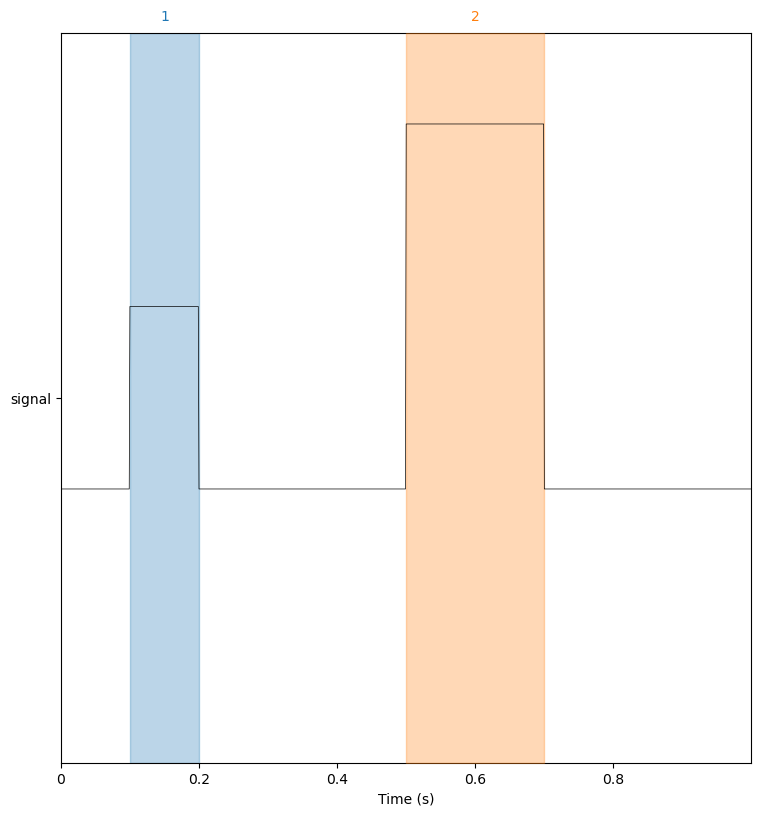

In [9]:
data = np.zeros((1, 1000))  # 1 channel, 1000 samples
data[0, 100:200] = 1
data[0, 500:700] = 2
info = create_info(["signal"], 1000, "misc")
raw = RawArray(data, info)
annotations = Annotations(onset=[0.1, 0.5], duration=[0.1, 0.2], description=["1", "2"])
raw.set_annotations(annotations)
set_browser_backend("matplotlib")  # easier to plot with matplotlib in a documentation
raw.plot(scalings=dict(misc=2), show_scrollbars=False, show_scalebars=False)
plt.show()

In [12]:
source_id = uuid.uuid4().hex
player = PlayerLSL(
    raw,
    chunk_size=1,
    name="tutorial-annots",
    source_id=source_id,
    annotations=True,
).start()

2024-12-02 14:12:33.472 (1144.164s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface ::1 (Can't assign requested address)
2024-12-02 14:12:33.472 (1144.164s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface fd20:b79e:93df:bfdb:4ae:a83b:d4f0:a892 (Can't assign requested address)
2024-12-02 14:12:33.472 (1144.164s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff02:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface 192.168.1.151 (Can't assign requested address)
2024-12-02 14:12:33.472 (1144.164s) [            3083]         udp_server.cpp:82    WARN| Could not bind multicast responder for ff05:113d:6fdd:2c17:a643:ffe2:1bd1:3cd2 to interface ::1 (Can't assign requested address)
2024-12-02 14:12:33.472 (1144.164s) [            3083]         udp_server.cpp:8

In [ ]:
player.stop()
del player

In [ ]:
from numpy.typing import NDArray
from scipy.signal import periodogram, welch
from scipy.integrate import simpson
def bandpower(
    data: NDArray[np.float64],
    fs: float,
    method: str,
    band: tuple[float, float],
    relative: bool = True,
    **kwargs,
) -> NDArray[np.float64]:
    """Compute the bandpower of the individual channels.

    Parameters
    ----------
    data : array of shape (n_channels, n_samples)
        Data on which the the bandpower is estimated.
    fs : float
        Sampling frequency in Hz.
    method : 'periodogram' | 'welch' | 'multitaper'
        Method used to estimate the power spectral density.
    band : tuple of shape (2,)
        Frequency band of interest in Hz as 2 floats, e.g. ``(8, 13)``. The
        edges are included.
    relative : bool
        If True, the relative bandpower is returned instead of the absolute
        bandpower.
    **kwargs : dict
        Additional keyword arguments are provided to the power spectral density
        estimation function.
        * 'periodogram': scipy.signal.periodogram
        * 'welch'``: scipy.signal.welch
        * 'multitaper': mne.time_frequency.psd_array_multitaper

        The only provided arguments are the data array and the sampling
        frequency.

    Returns
    -------
    bandpower : array of shape (n_channels,)
        The bandpower of each channel.
    """
    # compute the power spectral density
    assert (
        data.ndim == 2
    ), "The provided data must be a 2D array of shape (n_channels, n_samples)."
    if method == "periodogram":
        freqs, psd = periodogram(data, fs, **kwargs)
    elif method == "welch":
        freqs, psd = welch(data, fs, **kwargs)
    elif method == "multitaper":
        psd, freqs = psd_array_multitaper(data, fs, verbose="ERROR", **kwargs)
    else:
        raise RuntimeError(f"The provided method '{method}' is not supported.")
    # compute the bandpower
    assert len(band) == 2, "The 'band' argument must be a 2-length tuple."
    assert (
        band[0] <= band[1]
    ), "The 'band' argument must be defined as (low, high) (in Hz)."
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])
    bandpower = simpson(psd[:, idx_band], dx=freq_res)
    bandpower = bandpower / simpson(psd, dx=freq_res) if relative else bandpower
    return bandpower

In [24]:
stream = Stream(bufsize=2, source_id='acquisition').connect()
stream.pick("eeg") 
stream.set_eeg_reference("average")
mapping = dict(zip(stream.ch_names, ['stim']+['eeg']*68+['eog']*4))
stream.set_channel_types(mapping)
stream.get_channel_types()
stream.info


<Info | 8 non-empty values
 bads: []
 ch_names: Trig1, Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, ...
 chs: 1 Stimulus, 68 EEG, 4 EOG
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 73
 projs: []
 sfreq: 512.0 Hz
>

In [6]:
from bokeh.plotting import curdoc, figure
from bokeh.models import ColumnDataSource, Slider
import time

from matplotlib import pyplot as plt
from mne import set_log_level
from bokeh.io import output_file, show

from mne_lsl.player import PlayerLSL as Player
from mne_lsl.stream import StreamLSL as Stream
from dash_utils import bandpower
import random
import numpy as np


set_log_level("WARNING")

# retrieve the sample data
stream = Stream(bufsize=2, source_id='acquisition').connect()
stream.pick("eeg") 
stream.set_eeg_reference("average")
mapping = dict(zip(stream.ch_names, ['stim']+['eeg']*68+['eog']*4))
stream.set_channel_types(mapping)

names = ['delta', 'theta', 'alpha', 'beta', 'gamma']
lims = [(0.5, 4), (4, 8), (8, 13), (13, 30), (30, 50)]

# Initial data
data_init = {'names': names, 'values': [0]*5}

# Create a ColumnDataSource
source = ColumnDataSource(data=data_init)

# Create the plot
p = figure(x_range=names, height=500, width=1000, title="Dynamic Bar Plot",
           toolbar_location=None, tools="")
output_file(filename="bands.html")
# Add the bars to the plot
p.vbar(x='names', top='values', width=0.9, source=source)

# Format the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = "vertical"



def update_data():
  """Pulls data from the LSL stream, averages it, and updates the plot."""
  # Pull data (e.g., 1 second)
  data, ts = stream.get_data(2, picks='Oz')
  bp = [bandpower(data, stream.info["sfreq"], "periodogram", band=bs) for bs in lims]
  # Average data per channel
  # Update the plot
  source.data = {'names': names, 'values': bp}


curdoc().add_periodic_callback(update_data, 1000)  # Update every 1 second
# curdoc().add_root(p)
show(p)


In [8]:
import time
from bokeh.plotting import curdoc, figure
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource

# Enable notebook output
output_notebook()

# Create a data source
source = ColumnDataSource(data=dict(x=[0], y=[0]))

# Create the plot
p = figure(height=400, width=400, title="Streaming Circle Plot",
           tools="crosshair,pan,reset,save,wheel_zoom",
           x_range=[-2.5, 2.5], y_range=[-2.5, 2.5])

p.scatter(x='x', y='y', source=source, size=10, line_color=None, color="navy", alpha=0.5)

# Update function
def update():
    new_data = dict(x=[time.time() % 10 - 5], y=[time.sin(time.time())])
    source.stream(new_data, rollover=10)

# Add a periodic callback to update the plot every 500 milliseconds
curdoc().add_periodic_callback(update, 500)

# Show the plot
show(p)

Loading BokehJS ...

RuntimeError: Models must be owned by only a single document, LinearAxis(id='p1166', ...) is already in a doc